In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from nbodykit.lab import *
from nbodykit import style, setup_logging
import matplotlib.pyplot as plt
plt.style.use(style.notebook)
import gc

In [3]:
import momentum as m
import importlib
importlib.reload(m)

<module 'momentum' from '/Raid6/1/TeamYZ/xiting/momentum/momentum.py'>

In [4]:
def test_pole_2(cat, Nmesh, compensate):
    LOS=(1,0,0)
    cat['RsdPos_x'] = cat['RsdPos_x']%1000
    ls = '-' if compensate == True else '--'
    mesh = cat.to_mesh(interlaced=True,compensated=compensate, Nmesh=Nmesh, BoxSize=1000, window='tsc', position='RsdPos_x')
    r = FFTPower(mesh, mode='2d', dk=0.005, kmin=0.01, Nmu=5, los=[1,0,0], poles=[0,2,4])
    poles = r.poles
    ell = 2
    label = 'Nmesh=%d&compensat=%s' %(Nmesh,compensate)
    P = poles['power_%d' %ell].real
    # if ell == 0: P = P - poles.attrs['shotnoise']
        # if ell == 2
        # line, = plt.plot(x, y, label="")
    plt.plot(poles['k'], poles['k'] * P, label=label, ls=ls)
        # line.set_color('')
    plt.legend(loc=0)
    plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
    plt.ylabel(r"$k \ P_\ell$ [$h^{-2} \mathrm{Mpc}^2$]")
def test_pole_2_withoutplt(cat, Nmesh, compensate):
    LOS=(1,0,0)
    cat['RsdPos_x'] = cat['RsdPos_x']%1000
    # ls = '-' if compensate == True else '--'
    mesh = cat.to_mesh(interlaced=True,compensated=compensate, Nmesh=Nmesh, BoxSize=1000, window='tsc', position='RsdPos_x')
    r = FFTPower(mesh, mode='2d', dk=0.005, kmin=0.01, Nmu=5, los=[1,0,0], poles=[0,2,4])
    poles = r.poles
    ell = 2
    # label = 'Nmesh=%d&compensat=%s' %(Nmesh,compensate)
    P = poles['power_%d' %ell].real
    # # if ell == 0: P = P - poles.attrs['shotnoise']
    #     # if ell == 2
    #     # line, = plt.plot(x, y, label="")
    # plt.plot(poles['k'], poles['k'] * P, label=label, ls=ls)
    #     # line.set_color('')
    # plt.legend(loc=0)
    # plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
    # plt.ylabel(r"$k \ P_\ell$ [$h^{-2} \mathrm{Mpc}^2$]")
    return poles, P

In [5]:
def test_pole_0(cat, Nmesh, compensate):
    cat['RsdPos_x'] = cat['RsdPos_x']%1000
    ls = '-' if compensate == True else '--'
    mesh = cat.to_mesh(interlaced=True,compensated=compensate, Nmesh=Nmesh, BoxSize=1000, window='tsc', position='RsdPos_x')
    r = FFTPower(mesh, mode='2d', dk=0.005, kmin=0.01, Nmu=5, los=[1,0,0], poles=[0,2,4])
    poles = r.poles
    ell = 0
    label = 'Nmesh=%d&compensat=%s' %(Nmesh,compensate)
    P = poles['power_%d' %ell].real
    if ell == 0: P = P - poles.attrs['shotnoise']
    plt.plot(poles['k'], poles['k'] * P, label=label, ls=ls)
    plt.legend(loc=0)
    plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
    plt.ylabel(r"$k \ P_\ell$ [$h^{-2} \mathrm{Mpc}^2$]")
def test_pole_0_withoutplt(cat, Nmesh, compensate):
    cat['RsdPos_x'] = cat['RsdPos_x']%1000
    # ls = '-' if compensate == True else '--'
    mesh = cat.to_mesh(interlaced=True,compensated=compensate, Nmesh=Nmesh, BoxSize=1000, window='tsc', position='RsdPos_x')
    r = FFTPower(mesh, mode='2d', dk=0.005, kmin=0.01, Nmu=5, los=[1,0,0], poles=[0,2,4])
    poles = r.poles
    ell = 0
    P = poles['power_%d' %ell].real
    if ell == 0: P = P - poles.attrs['shotnoise']
    return poles, P

In [6]:
def test_pole_4(cat, Nmesh, compensate):
    cat['RsdPos_x'] = cat['RsdPos_x']%1000
    ls = '-' if compensate == True else '--'
    mesh = cat.to_mesh(interlaced=True,compensated=compensate, Nmesh=Nmesh, BoxSize=1000, window='tsc', position='RsdPos_x')
    r = FFTPower(mesh, mode='2d', dk=0.005, kmin=0.01, Nmu=5, los=[1,0,0], poles=[0,2,4])
    poles = r.poles
    ell = 4
    label = 'Nmesh=%d&compensat=%s' %(Nmesh,compensate)
    P = poles['power_%d' %ell].real
    plt.plot(poles['k'], poles['k'] * P, label=label, ls=ls)
    plt.legend(loc=0)
    plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
    plt.ylabel(r"$k \ P_\ell$ [$h^{-2} \mathrm{Mpc}^2$]")
def test_pole_4_withoutplt(cat, Nmesh, compensate):
    cat['RsdPos_x'] = cat['RsdPos_x']%100
    mesh = cat.to_mesh(interlaced=True,compensated=compensate, Nmesh=Nmesh, BoxSize=1000, window='tsc', position='RsdPos_x')
    r = FFTPower(mesh, mode='2d', dk=0.005, kmin=0.01, Nmu=5, los=[1,0,0], poles=[0,2,4])
    poles = r.poles
    ell = 4
    P = poles['power_%d' %ell].real
    return poles, P

In [7]:
num = 12
cat = m.data_read(num)
cat_RSD = m.RED(cat)
del cat
gc.collect()

0

/tmp/ipykernel_2498938/3565648290.py:5: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh = cat.to_mesh(interlaced=True,compensated=compensate, Nmesh=Nmesh, BoxSize=1000, window='tsc', position='RsdPos_x')


/tmp/ipykernel_2498938/3565648290.py:5: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh = cat.to_mesh(interlaced=True,compensated=compensate, Nmesh=Nmesh, BoxSize=1000, window='tsc', position='RsdPos_x')


/tmp/ipykernel_2498938/3565648290.py:5: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh = cat.to_mesh(interlaced=True,compensated=compensate, Nmesh=Nmesh, BoxSize=1000, window='tsc', position='RsdPos_x')


/tmp/ipykernel_2498938/3565648290.py:5: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh = cat.to_mesh(interlaced=True,compensated=compensate, Nmesh=Nmesh, BoxSize=1000, window='tsc', position='RsdPos_x')


/tmp/ipykernel_2498938/3565648290.py:5: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh = cat.to_mesh(interlaced=True,compensated=compensate, Nmesh=Nmesh, BoxSize=1000, window='tsc', position='RsdPos_x')


/tmp/ipykernel_2498938/3565648290.py:5: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh = cat.to_mesh(interlaced=True,compensated=compensate, Nmesh=Nmesh, BoxSize=1000, window='tsc', position='RsdPos_x')


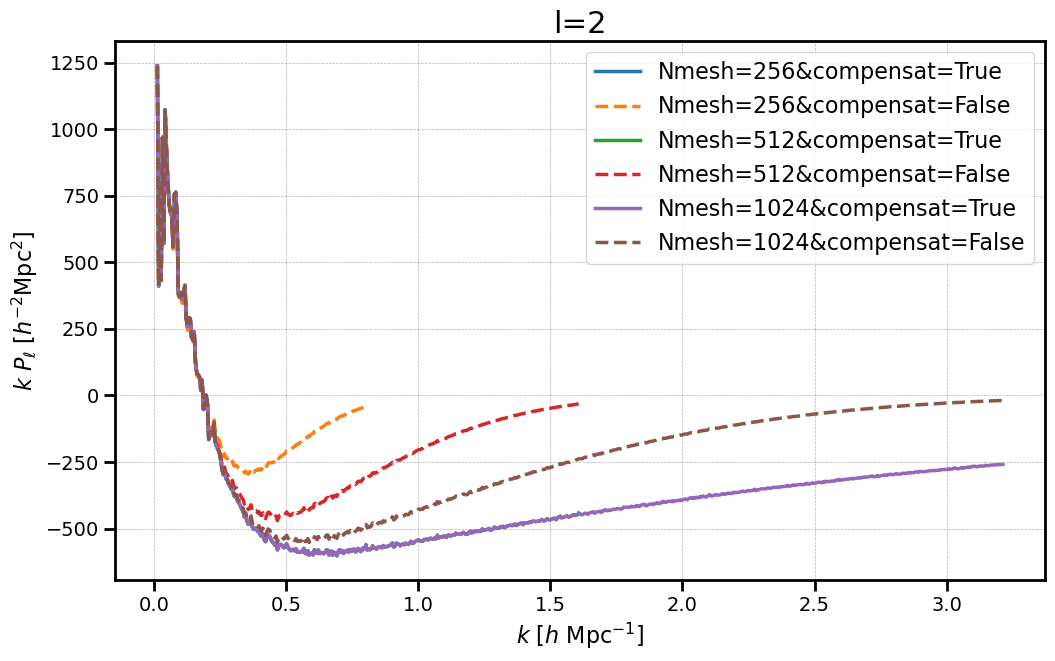

In [8]:
plt.figure()
for Nmesh in[256,512,1024]:
    for compensat in [True, False]:
        test_pole_2(cat_RSD, Nmesh=Nmesh, compensate=compensat)
plt.title('l=2')
plt.show()


/tmp/ipykernel_2498938/1422243803.py:4: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh = cat.to_mesh(interlaced=True,compensated=compensate, Nmesh=Nmesh, BoxSize=1000, window='tsc', position='RsdPos_x')


/tmp/ipykernel_2498938/1422243803.py:4: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh = cat.to_mesh(interlaced=True,compensated=compensate, Nmesh=Nmesh, BoxSize=1000, window='tsc', position='RsdPos_x')


/tmp/ipykernel_2498938/1422243803.py:4: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh = cat.to_mesh(interlaced=True,compensated=compensate, Nmesh=Nmesh, BoxSize=1000, window='tsc', position='RsdPos_x')


/tmp/ipykernel_2498938/1422243803.py:4: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh = cat.to_mesh(interlaced=True,compensated=compensate, Nmesh=Nmesh, BoxSize=1000, window='tsc', position='RsdPos_x')


/tmp/ipykernel_2498938/1422243803.py:4: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh = cat.to_mesh(interlaced=True,compensated=compensate, Nmesh=Nmesh, BoxSize=1000, window='tsc', position='RsdPos_x')


/tmp/ipykernel_2498938/1422243803.py:4: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh = cat.to_mesh(interlaced=True,compensated=compensate, Nmesh=Nmesh, BoxSize=1000, window='tsc', position='RsdPos_x')


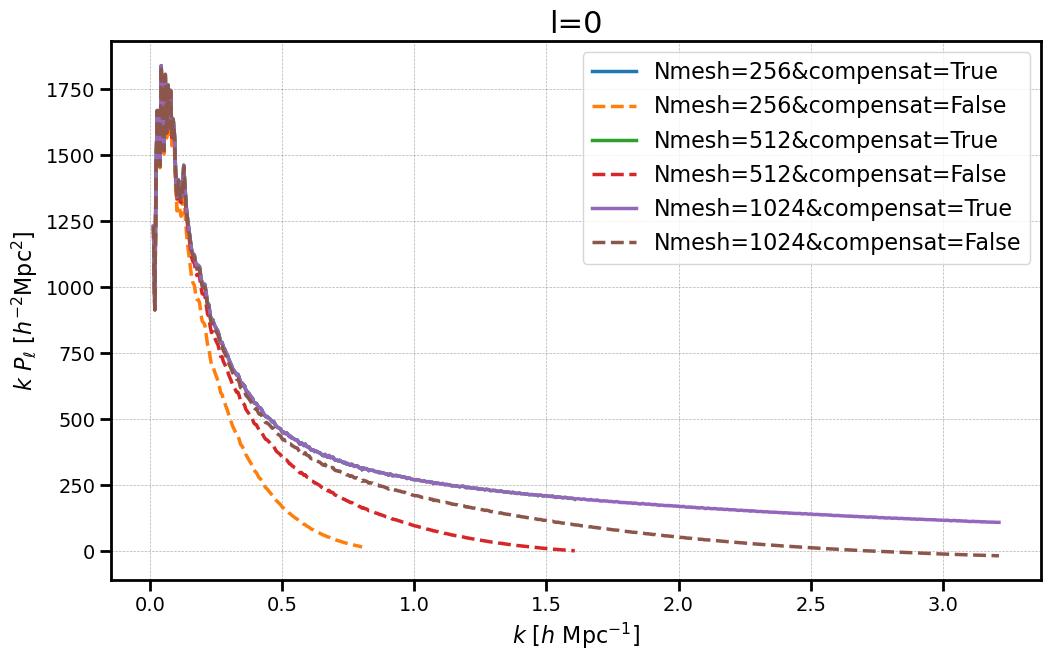

In [9]:
plt.figure()
for Nmesh in[256,512,1024]:
    for compensat in [True, False]:
        test_pole_0(cat_RSD, Nmesh=Nmesh, compensate=compensat)
plt.title('l=0')
plt.show()

/tmp/ipykernel_2498938/2876689465.py:4: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh = cat.to_mesh(interlaced=True,compensated=compensate, Nmesh=Nmesh, BoxSize=1000, window='tsc', position='RsdPos_x')


/tmp/ipykernel_2498938/2876689465.py:4: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh = cat.to_mesh(interlaced=True,compensated=compensate, Nmesh=Nmesh, BoxSize=1000, window='tsc', position='RsdPos_x')


/tmp/ipykernel_2498938/2876689465.py:4: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh = cat.to_mesh(interlaced=True,compensated=compensate, Nmesh=Nmesh, BoxSize=1000, window='tsc', position='RsdPos_x')


/tmp/ipykernel_2498938/2876689465.py:4: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh = cat.to_mesh(interlaced=True,compensated=compensate, Nmesh=Nmesh, BoxSize=1000, window='tsc', position='RsdPos_x')


/tmp/ipykernel_2498938/2876689465.py:4: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh = cat.to_mesh(interlaced=True,compensated=compensate, Nmesh=Nmesh, BoxSize=1000, window='tsc', position='RsdPos_x')


/tmp/ipykernel_2498938/2876689465.py:4: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh = cat.to_mesh(interlaced=True,compensated=compensate, Nmesh=Nmesh, BoxSize=1000, window='tsc', position='RsdPos_x')


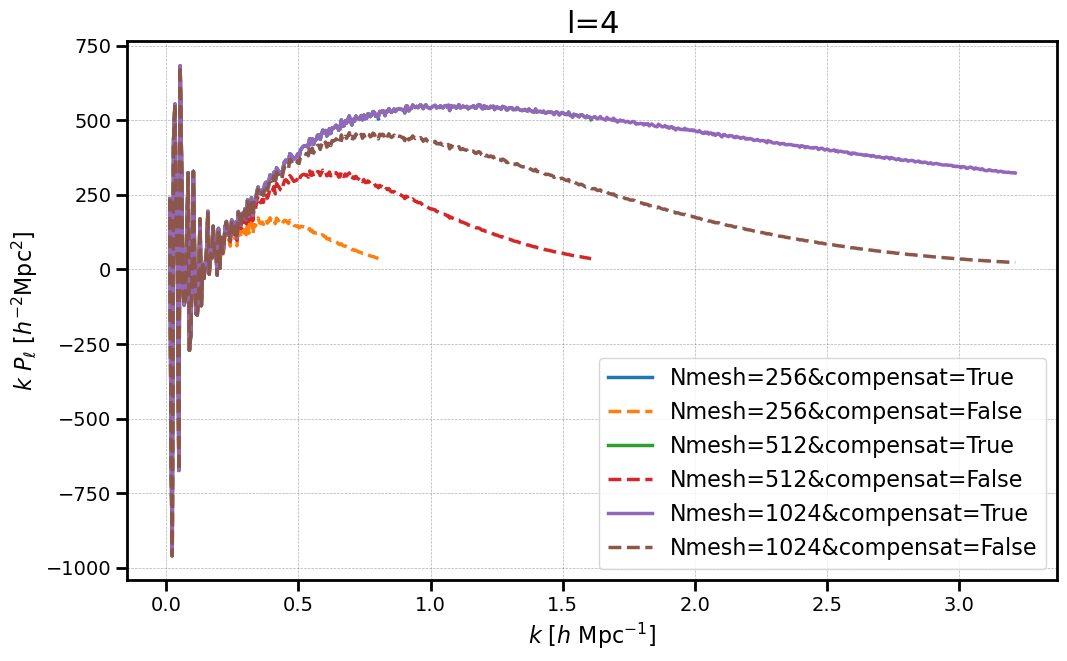

In [10]:
plt.figure()
for Nmesh in[256,512,1024]:
    for compensat in [True, False]:
        test_pole_4(cat_RSD, Nmesh=Nmesh, compensate=compensat)
plt.title('l=4')
plt.show()

/tmp/ipykernel_2498938/3565648290.py:23: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh = cat.to_mesh(interlaced=True,compensated=compensate, Nmesh=Nmesh, BoxSize=1000, window='tsc', position='RsdPos_x')


/tmp/ipykernel_2498938/3565648290.py:23: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh = cat.to_mesh(interlaced=True,compensated=compensate, Nmesh=Nmesh, BoxSize=1000, window='tsc', position='RsdPos_x')


/tmp/ipykernel_2498938/3565648290.py:23: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh = cat.to_mesh(interlaced=True,compensated=compensate, Nmesh=Nmesh, BoxSize=1000, window='tsc', position='RsdPos_x')


/tmp/ipykernel_2498938/3565648290.py:23: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh = cat.to_mesh(interlaced=True,compensated=compensate, Nmesh=Nmesh, BoxSize=1000, window='tsc', position='RsdPos_x')


/tmp/ipykernel_2498938/3565648290.py:23: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh = cat.to_mesh(interlaced=True,compensated=compensate, Nmesh=Nmesh, BoxSize=1000, window='tsc', position='RsdPos_x')


/tmp/ipykernel_2498938/3565648290.py:23: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh = cat.to_mesh(interlaced=True,compensated=compensate, Nmesh=Nmesh, BoxSize=1000, window='tsc', position='RsdPos_x')


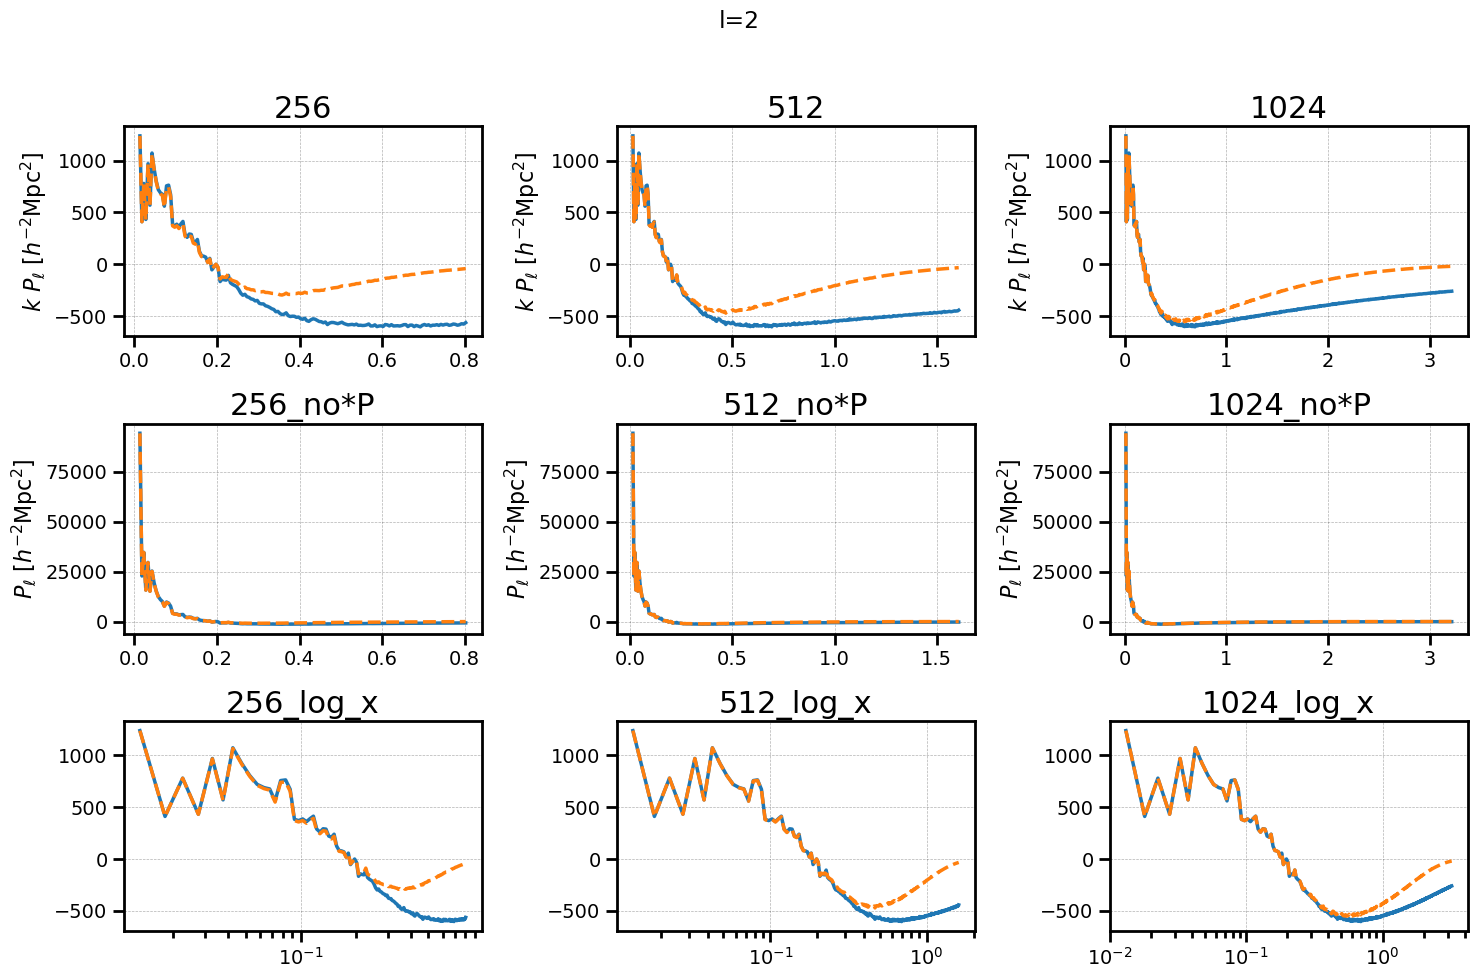

In [11]:
f, axis = plt.subplots(ncols=3, nrows=3, figsize=(15,10))
for j, Nmesh in enumerate([256, 512, 1024]):
    for compensate in [True, False]:
        i = 0
        ploes, P =test_pole_2_withoutplt(cat_RSD, Nmesh=Nmesh, compensate=compensate)
        ax_1 = axis[i,j]
        ls = '-' if compensate == True else '--'
        label = 'Nmesh=%d&compensat=%s' %(Nmesh,compensate)
        ax_1.plot(ploes['k'], P*ploes['k'], label=label, ls=ls)
        ax_1.set_title(f'{Nmesh}')
        ax_1.set_ylabel(r"$k \ P_\ell$ [$h^{-2} \mathrm{Mpc}^2$]")
        i = 1
        ax_2 = axis[i,j]
        ax_2.plot(ploes['k'], P, label=label, ls=ls)
        ax_2.set_title(f'{Nmesh}_no*P')
        ax_2.set_ylabel(r"$P_\ell$ [$h^{-2} \mathrm{Mpc}^2$]")
        i = 2
        ax_3 = axis[i,j]
        ax_3.semilogx(ploes['k'], P*ploes['k'], label=label, ls=ls)
        ax_3.set_title(f'{Nmesh}_log_x')
del ploes, P
gc.collect()
f.suptitle('l=2')
f.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

/tmp/ipykernel_2498938/1422243803.py:18: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh = cat.to_mesh(interlaced=True,compensated=compensate, Nmesh=Nmesh, BoxSize=1000, window='tsc', position='RsdPos_x')


/tmp/ipykernel_2498938/1422243803.py:18: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh = cat.to_mesh(interlaced=True,compensated=compensate, Nmesh=Nmesh, BoxSize=1000, window='tsc', position='RsdPos_x')


/tmp/ipykernel_2498938/1422243803.py:18: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh = cat.to_mesh(interlaced=True,compensated=compensate, Nmesh=Nmesh, BoxSize=1000, window='tsc', position='RsdPos_x')


/tmp/ipykernel_2498938/1422243803.py:18: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh = cat.to_mesh(interlaced=True,compensated=compensate, Nmesh=Nmesh, BoxSize=1000, window='tsc', position='RsdPos_x')


/tmp/ipykernel_2498938/1422243803.py:18: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh = cat.to_mesh(interlaced=True,compensated=compensate, Nmesh=Nmesh, BoxSize=1000, window='tsc', position='RsdPos_x')


/tmp/ipykernel_2498938/1422243803.py:18: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh = cat.to_mesh(interlaced=True,compensated=compensate, Nmesh=Nmesh, BoxSize=1000, window='tsc', position='RsdPos_x')


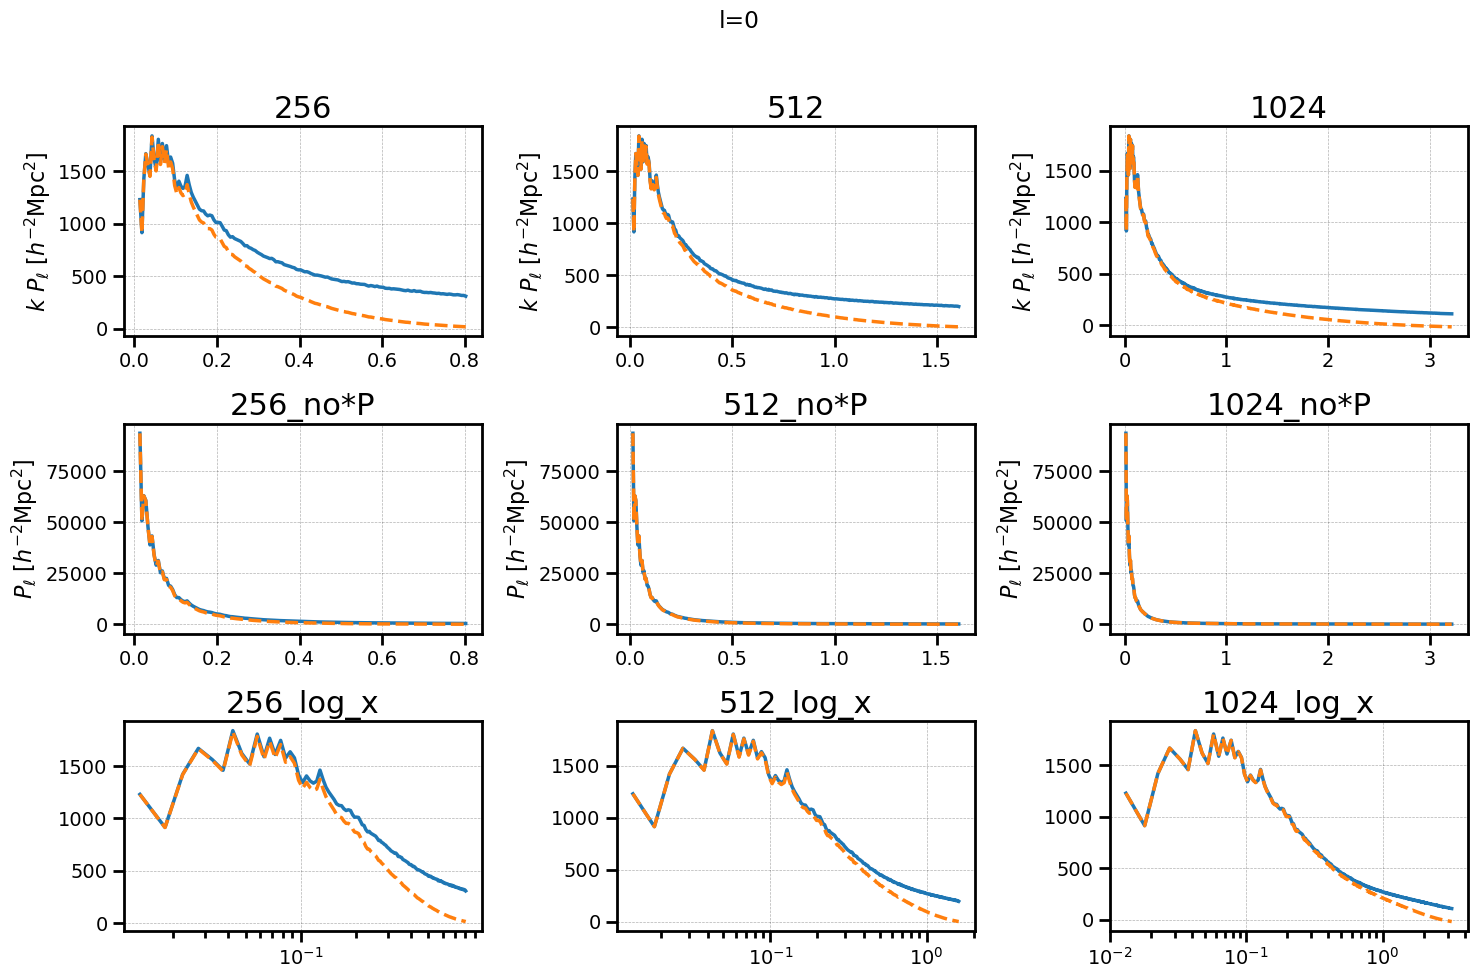

In [12]:
f, axis = plt.subplots(ncols=3, nrows=3, figsize=(15,10))
for j, Nmesh in enumerate([256, 512, 1024]):
    for compensate in [True, False]:
        i = 0
        ploes, P =test_pole_0_withoutplt(cat_RSD, Nmesh=Nmesh, compensate=compensate)
        ax_1 = axis[i,j]
        ls = '-' if compensate == True else '--'
        label = 'Nmesh=%d&compensat=%s' %(Nmesh,compensate)
        ax_1.plot(ploes['k'], P*ploes['k'], label=label, ls=ls)
        ax_1.set_title(f'{Nmesh}')
        ax_1.set_ylabel(r"$k \ P_\ell$ [$h^{-2} \mathrm{Mpc}^2$]")
        i = 1
        ax_2 = axis[i,j]
        ax_2.plot(ploes['k'], P, label=label, ls=ls)
        ax_2.set_title(f'{Nmesh}_no*P')
        ax_2.set_ylabel(r"$P_\ell$ [$h^{-2} \mathrm{Mpc}^2$]")
        i = 2
        ax_3 = axis[i,j]
        ax_3.semilogx(ploes['k'], P*ploes['k'], label=label, ls=ls)
        ax_3.set_title(f'{Nmesh}_log_x')
del ploes, P
gc.collect()
f.suptitle('l=0')
f.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

/tmp/ipykernel_2498938/2876689465.py:16: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh = cat.to_mesh(interlaced=True,compensated=compensate, Nmesh=Nmesh, BoxSize=1000, window='tsc', position='RsdPos_x')


/tmp/ipykernel_2498938/2876689465.py:16: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh = cat.to_mesh(interlaced=True,compensated=compensate, Nmesh=Nmesh, BoxSize=1000, window='tsc', position='RsdPos_x')


/tmp/ipykernel_2498938/2876689465.py:16: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh = cat.to_mesh(interlaced=True,compensated=compensate, Nmesh=Nmesh, BoxSize=1000, window='tsc', position='RsdPos_x')


/tmp/ipykernel_2498938/2876689465.py:16: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh = cat.to_mesh(interlaced=True,compensated=compensate, Nmesh=Nmesh, BoxSize=1000, window='tsc', position='RsdPos_x')


/tmp/ipykernel_2498938/2876689465.py:16: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh = cat.to_mesh(interlaced=True,compensated=compensate, Nmesh=Nmesh, BoxSize=1000, window='tsc', position='RsdPos_x')


/tmp/ipykernel_2498938/2876689465.py:16: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh = cat.to_mesh(interlaced=True,compensated=compensate, Nmesh=Nmesh, BoxSize=1000, window='tsc', position='RsdPos_x')


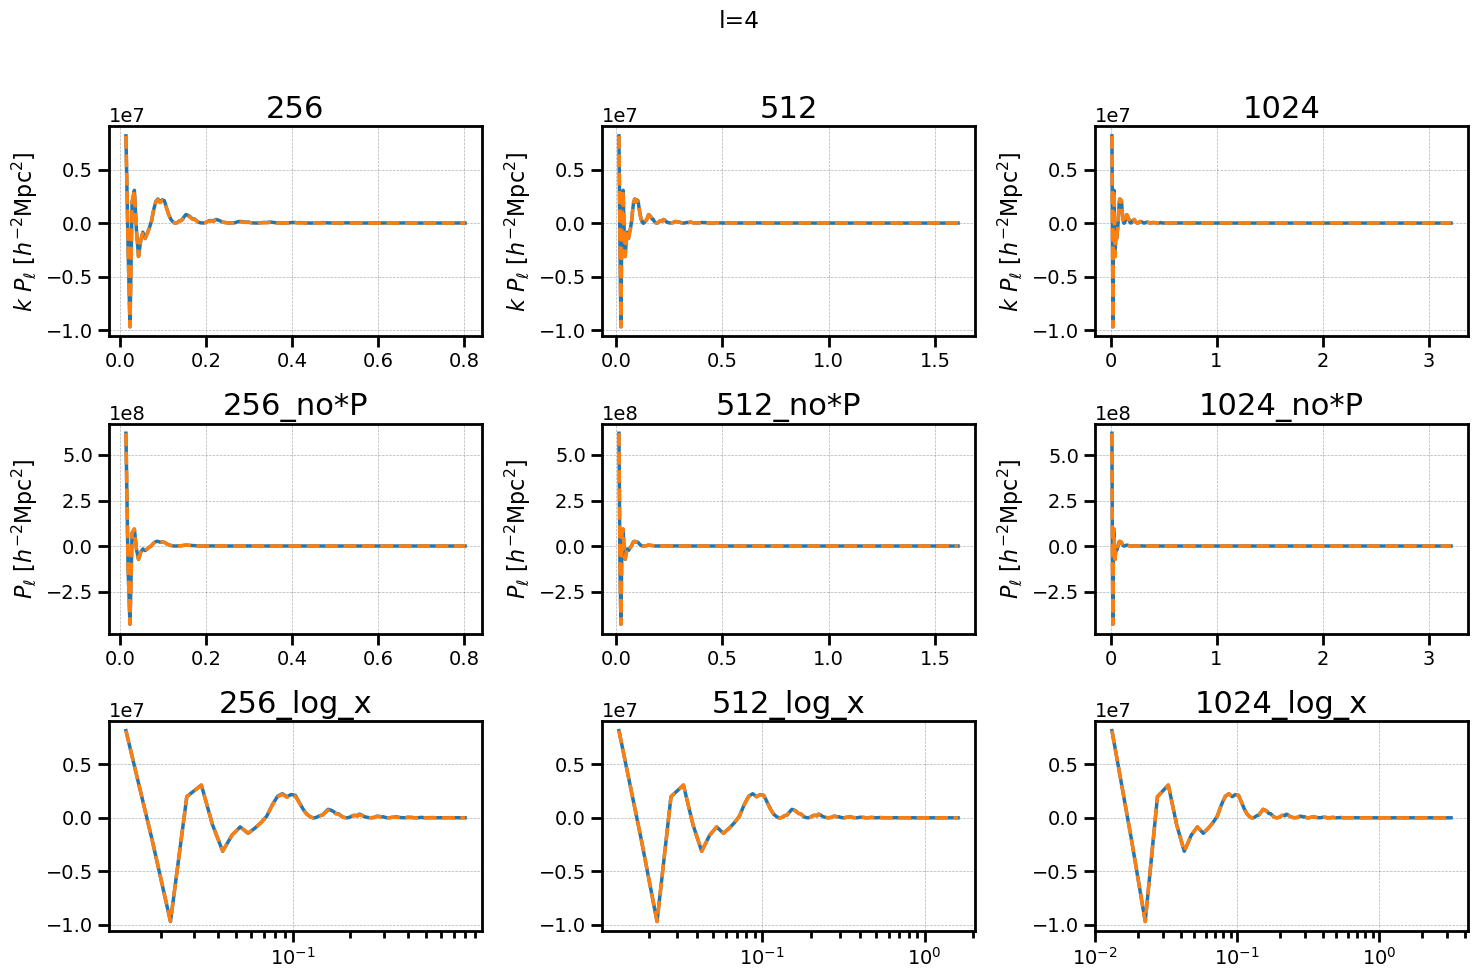

In [13]:
f, axis = plt.subplots(ncols=3, nrows=3, figsize=(15,10))
for j, Nmesh in enumerate([256, 512, 1024]):
    for compensate in [True, False]:
        i = 0
        ploes, P =test_pole_4_withoutplt(cat_RSD, Nmesh=Nmesh, compensate=compensate)
        ax_1 = axis[i,j]
        ls = '-' if compensate == True else '--'
        label = 'Nmesh=%d&compensat=%s' %(Nmesh,compensate)
        ax_1.plot(ploes['k'], P*ploes['k'], label=label, ls=ls)
        ax_1.set_title(f'{Nmesh}')
        ax_1.set_ylabel(r"$k \ P_\ell$ [$h^{-2} \mathrm{Mpc}^2$]")
        i = 1
        ax_2 = axis[i,j]
        ax_2.plot(ploes['k'], P, label=label, ls=ls)
        ax_2.set_title(f'{Nmesh}_no*P')
        ax_2.set_ylabel(r"$P_\ell$ [$h^{-2} \mathrm{Mpc}^2$]")
        i = 2
        ax_3 = axis[i,j]
        ax_3.semilogx(ploes['k'], P*ploes['k'], label=label, ls=ls)
        ax_3.set_title(f'{Nmesh}_log_x')
del ploes, P
gc.collect()
f.suptitle('l=4')
f.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()